# CMSC 197 Problem Set: Implementing Linear Regression with Gradient Descent as Optimization Function

Author: Chester Ken Gallego

Date: September 24, 2024

Link to the github repository: https://github.com/chstrkn/CMSC197

## Application

### 1. Load `Advertising.csv` dataset using pandas  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('Advertising.csv')
data = data.drop("Unnamed: 0", axis = 1)

data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### 2. Standardize each column of the dataset

In [7]:
X = data.drop("Sales", axis = 1)
y = data["Sales"]

X_standardized = pd.DataFrame(scale(X), columns=X.columns)

X_standardized

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


### 3. Add extra column of ones to X

In [9]:
X_standardized.insert(0, 'Bias', 1)

X_standardized

,Bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217
196,1,-0.617035,-1.240003,-1.033598
197,1,0.349810,-0.942899,-1.111852
198,1,1.594565,1.265121,1.640850


### 4. Divide the dataset into training and testing, with 0.85 and 0.15 ratio

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.15, random_state=42)

print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (170, 4)
y_train size: (170,)
X_test size: (30, 4)
y_test size: (30,)


### 5. Fit the model on the training set using gradient descent

In [13]:
def initialize_weights():
    return np.zeros(4)

def predict(X, weights):
    return np.dot(X, weights)

def compute_cost(X, y, weights):
    m = len(y)
    prediction = predict(X, weights)
    return (1 / (2 * m)) * np.sum((prediction - y) ** 2)

def compute_gradient(X, y, weights):
    m = len(y)
    prediction = predict(X, weights)
    error = prediction - y
    return (1 / m) * np.dot(X.T, error)

def update_weights(weights, learning_rate, gradient):
    return weights - learning_rate * gradient

def grad_descent(X, y, learning_rate, iterations):
    weights = initialize_weights()
    costs = []
    for i in range(iterations):
        cost = compute_cost(X, y, weights)
        costs.append(cost)
        gradient = compute_gradient(X, y, weights)
        weights = update_weights(weights, learning_rate, gradient)
    return weights, costs

def plot_costs(costs, learning_rate):
    plt.figure(figsize=(18, 6))
    plt.plot(costs)
    plt.title(f'Cost vs. Iteration (Learning Rate: {learning_rate})')
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.show()

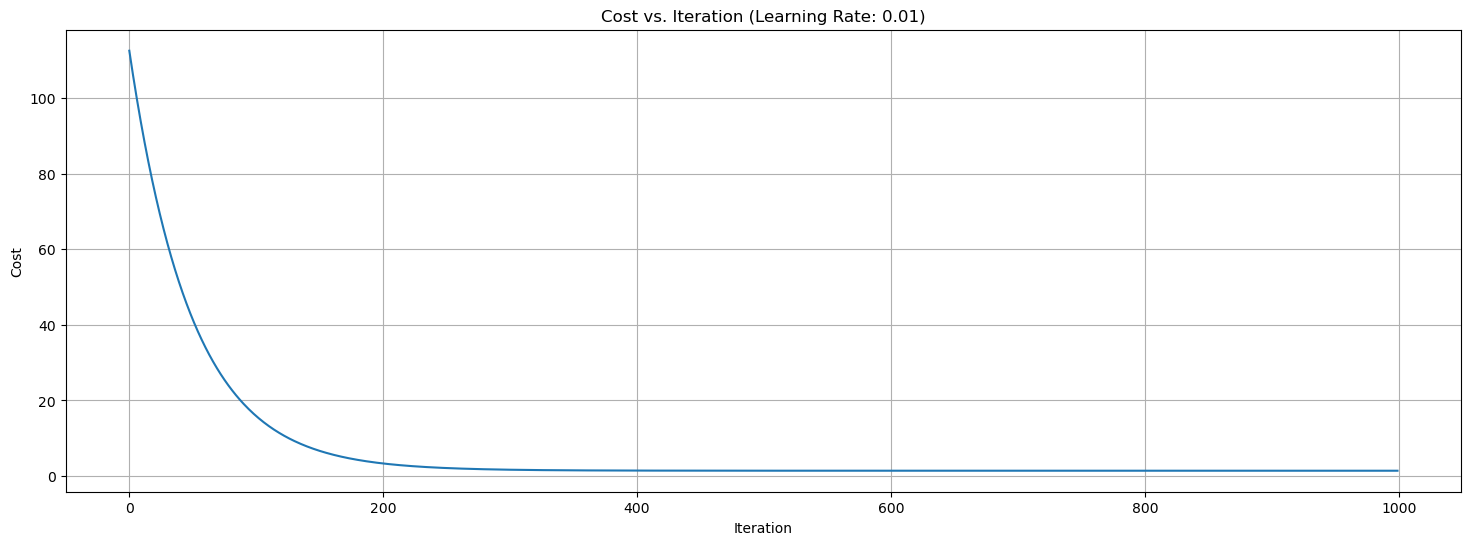

In [14]:
learning_rate = 0.01
iterations = 1000

weights, costs = grad_descent(X_train, y_train, learning_rate, iterations)

plot_costs(costs, learning_rate)

### 6. Predict the quantitative response y on the train set

In [16]:
train_predictions = predict(X_train, weights)
train_cost = compute_cost(X_train, y_train, weights)

print("Train Set MSE:", train_cost)

train_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions})

print("Train Set Predictions:")
train_comparison.head()

Train Set MSE: 1.390486093498493
Train Set Predictions:


,Actual,Predicted
9,10.6,12.489657
18,11.3,10.004317
55,23.7,21.295409
75,8.7,12.092761
150,16.1,18.256849


### 7. Predict the quantitative response y on the test set

In [18]:
test_predictions = predict(X_test, weights)
test_cost = compute_cost(X_test, y_test, weights)

print("Test Set MSE:", test_cost)

test_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

print("Test Set Predictions:")
test_comparison.head()

Test Set MSE: 1.4275242976291418
Test Set Predictions:


,Actual,Predicted
95,16.9,16.342429
15,22.4,20.812073
30,21.4,21.520254
158,7.3,10.539472
128,24.7,22.127674


### 8. Revert standardized data into original form

In [20]:
X_mean = X.mean()
X_std = X.std()

X_original = X_standardized.drop("Bias", axis = 1) * X_std + X_mean

X_original

,TV,Radio,Newspaper
0,230.308426,37.836477,69.296979
1,44.242678,39.340241,45.136502
2,16.874171,45.956803,69.397230
3,151.511186,41.345260,58.570128
4,180.884712,10.768723,58.469877
...,...,...,...
195,37.926869,3.650906,13.757957
196,94.067396,4.853917,8.043654
197,177.075176,9.264959,6.339388
198,283.942679,42.047016,66.289451


## Questions

<h3>1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:

$$ h_{\theta }\left(x\right)=\theta _{\theta }+\theta _1TV+\theta _2Radio+\theta _3Newspaper $$
    
What are your interpretations regarding the formed linear model?
</h3>

In [23]:
bias = weights[0]
tv = weights[1]
radio = weights[2]
newspaper = weights[3]

print(f'\nh_theta(x) = {bias} + {tv}*TV + {radio}*Radio + {newspaper}*Newspaper')


h_theta(x) = 14.024223605078369 + 3.8378415457665325*TV + 2.788181847104934*Radio + 0.019676850656914744*Newspaper


Based on the linear regression model, we can say that every unit increase in TV results in a 3.8378415457665325 unit increase in sales. Similarly, every unit increase in Radio leads to a 2.788181847104934 unit increase in sales, and every unit increase in Newspaper results in a 0.019676850656914744 unit increase in sales. Overall, TV has the largest impact on sales.

### 2. Provide a scatter plot of the $ \left(\hat{y^{\left(i\right)}}\right) $ and $ y^{\left(i\right)} $ for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

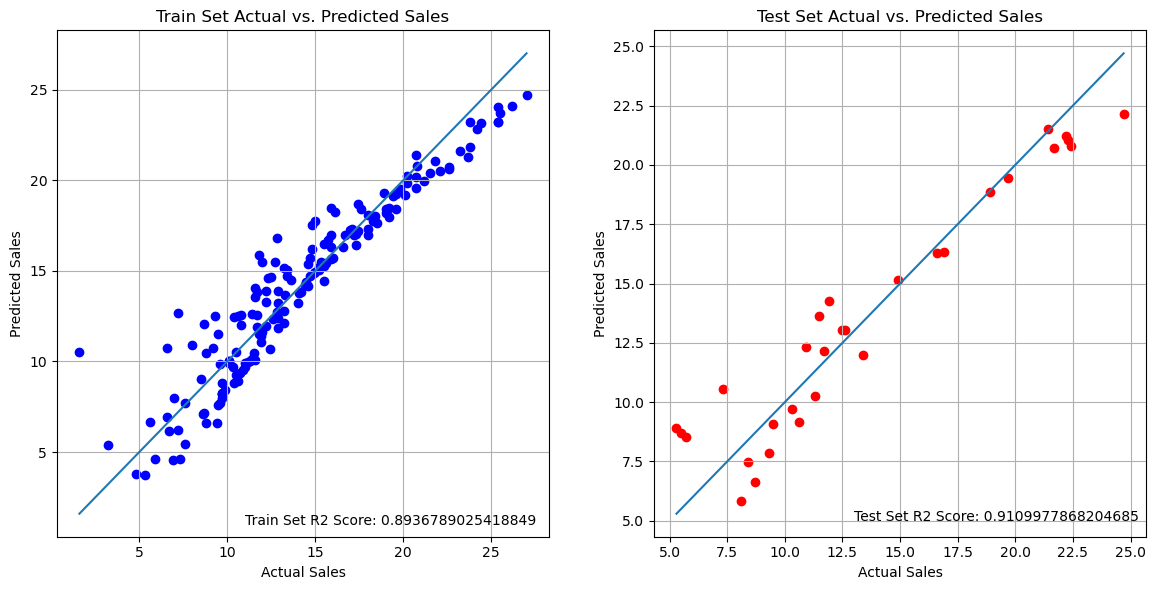

In [26]:
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color="blue")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.title("Train Set Actual vs. Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.text(11, 1, f"Train Set R2 Score: {train_r2}")
plt.grid(True)

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color="red")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.title("Test Set Actual vs. Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.text(13, 5, f"Test Set R2 Score: {test_r2}")
plt.grid(True)

plt.tight_layout()
plt.show()

Based on the scatter plots of $ \left(\hat{y^{\left(i\right)}}\right) $ and $ y^{\left(i\right)} $ for both the train and test sets, we observe a positive relationship between the predicted and actual sales values. The train set has an R2 score of 0.8936789025418849, while the test set has a score of 0.9109977868204685. A high R2, approaching 1, indicates that our model effectively captures the variance in the data. Since both R2 scores exceed 0.75, this suggests a very strong positive relationship between the predicted and actual sales values.

### 3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

In [29]:
iteration_list = [100, 500, 1000, 2000, 5000, 10000, 25000, 50000]

for iteration in iteration_list:
    weights, costs = grad_descent(X_train, y_train, learning_rate, iteration)
    train_prediction = predict(X_train, weights)
    test_prediction = predict(X_test, weights)

    print(f"Iterations: {iteration}")
    print(f"Train Set R2 Score ({iteration} iterations): {r2_score(y_train, train_prediction)}")
    print(f"Test Set R2 Score ({iteration} iterations): {r2_score(y_test, test_prediction)}\n")
    print(f"Final Cost: {costs[-1]}")

Iterations: 100
Train Set R2 Score (100 iterations): -0.21194805253496263
Test Set R2 Score (100 iterations): 0.030802786466838983

Final Cost: 16.146860109555984
Iterations: 500
Train Set R2 Score (500 iterations): 0.8932074957584099
Test Set R2 Score (500 iterations): 0.9098267032652457

Final Cost: 1.3967600912212201
Iterations: 1000
Train Set R2 Score (1000 iterations): 0.8936789025418849
Test Set R2 Score (1000 iterations): 0.9109977868204685

Final Cost: 1.3904861650783
Iterations: 2000
Train Set R2 Score (2000 iterations): 0.8936793584555877
Test Set R2 Score (2000 iterations): 0.9110274787757986

Final Cost: 1.3904801309791275
Iterations: 5000
Train Set R2 Score (5000 iterations): 0.8936793584593188
Test Set R2 Score (5000 iterations): 0.9110275702091692

Final Cost: 1.3904801309297572
Iterations: 10000
Train Set R2 Score (10000 iterations): 0.8936793584593188
Test Set R2 Score (10000 iterations): 0.9110275702091717

Final Cost: 1.3904801309297576
Iterations: 25000
Train Set R2

Based on the results above, we can see that as the number of iterations increases, the cost and R2 scores stabilize. This implies that the model explains a larger portion of the variance in the target variable. However, we observe that the difference between 10,000 and 50,000 iterations is almost nonexistent. Therefore, we can conclude that 10,000 iterations are sufficient to achieve the minimum cost.

### 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

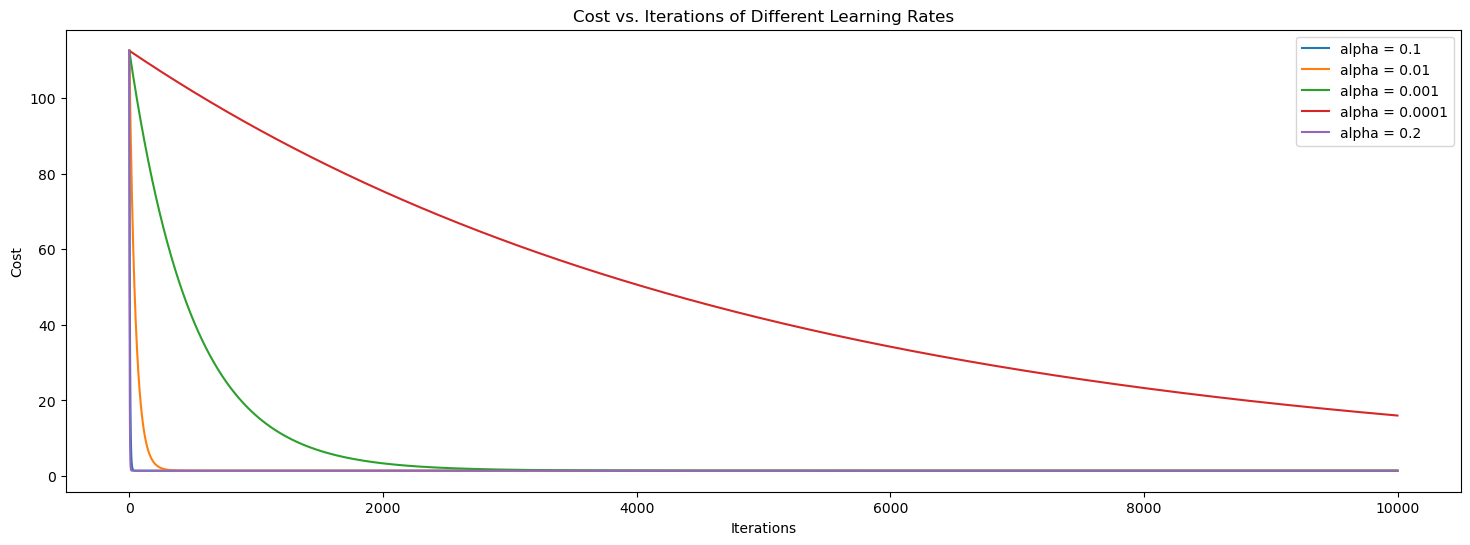

In [52]:
iterations = 10000
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

plt.figure(figsize=(18, 6))

for learning_rate in learning_rates:
    weights, costs = grad_descent(X_train, y_train, learning_rate, iterations)
    plt.plot(costs, label=f"alpha = {learning_rate}")

plt.title("Cost vs. Iterations of Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

Based on the figures above, when the learning rate is too small, such as 0.0001 or 0.001, the cost remains high and decreases very slowly. This indicates that the model is making minimal progress toward minimizing the cost, which can lead to long training times. On the other hand, when the learning rate is high, like 0.1 or 0.2, the cost function exhibits significant fluctuations, often overshooting the minimum and leading to instability.

### 5. Is there a relationship on the learning rate and the number of iterations?

There is an inverse relationship between the learning rate and the number of iterations required for convergence. Higher learning rates reduce the number of iterations needed to reach convergence, but they carry the risk of overshooting the optimal solution or causing instability. Conversely, lower learning rates require a greater number of iterations to converge, but they tend to provide more stable and reliable convergence. This trade-off highlights the importance of selecting an appropriate learning rate to balance convergence speed and model stability.

### 6. Compare the results with the results of ordinary least squares function.

In [37]:
from sklearn.linear_model import LinearRegression

# Fit the OLS model
ols_model = LinearRegression()
ols_model.fit(X_train.iloc[:, 1:], y_train) # Do not include Bias column

# Get OLS predictions
ols_train_predictions = ols_model.predict(X_train.iloc[:, 1:])
ols_test_predictions = ols_model.predict(X_test.iloc[:, 1:])

# Calculate OLS R2 Scores
ols_train_r2 = r2_score(y_train, ols_train_predictions)
ols_test_r2 = r2_score(y_test, ols_test_predictions)

# Calculate OLS MSE
ols_train_mse = mean_squared_error(y_train, ols_train_predictions)
ols_test_mse = mean_squared_error(y_test, ols_test_predictions)

# Display OLS results
print(f"OLS Train Set R2 Score: {ols_train_r2}")
print(f"OLS Test Set R2 Score: {ols_test_r2}")
print(f"OLS Train Set MSE: {ols_train_mse}")
print(f"OLS Test Set MSE: {ols_test_mse}")
print(f"OLS Coefficients: {ols_model.intercept_}, {ols_model.coef_}")

# Display Gradient Descent results
print(f"Gradient Descent Train Set R2 Score: {train_r2}")
print(f"Gradient Descent Test Set R2 Score: {test_r2}")
print(f"Gradient Descent Train Set MSE: {train_cost}")
print(f"Gradient Descent Test Set MSE: {test_cost}")
print(f"Gradient Descent Coefficients: {weights[0]}, {weights[1:]}")

OLS Train Set R2 Score: 0.8936793584593188
OLS Test Set R2 Score: 0.9110275702091712
OLS Train Set MSE: 2.780960261859515
OLS Test Set MSE: 2.85409319180212
OLS Coefficients: 14.02477266922176, [3.83763432 2.79115525 0.01635503]
Gradient Descent Train Set R2 Score: 0.8936789025418849
Gradient Descent Test Set R2 Score: 0.9109977868204685
Gradient Descent Train Set MSE: 1.390486093498493
Gradient Descent Test Set MSE: 1.4275242976291418
Gradient Descent Coefficients: 14.024772669221845, [3.83763432 2.79115525 0.01635503]


Both OLS and Gradient Descent have similar R2 scores which means they fit the data similarly. However, Gradient Descent has a lower MSE which means its predictions are closer to the actual values. Therefore, Gradient Descent performs better than OLS.